                                **Sentiment Analysis**

In [1]:
pip install pandas nltk textblob matplotlib

In [8]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [14]:
df = pd.read_csv("test1.csv")

In [12]:
# Save the DataFrame to a new CSV file named 'test1.csv'
df.to_csv('test1.csv', index=False)

print('File saved as test1.csv')

# Verify the new file exists
!ls

File saved as test1.csv
sample_data  test1.csv	test.csv


In [11]:
import pandas as pd

# Load the CSV file with 'latin1' encoding
df = pd.read_csv("test.csv", encoding='latin1')

# Display the first 5 rows of the DataFrame
display(df.head())

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [15]:
df.columns

Index(['textID', 'text', 'sentiment', 'Time of Tweet', 'Age of User',
       'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'],
      dtype='object')

In [16]:
#sentiment analysis function
def analyze_sentiment(text):
    analysis = TextBlob(str(text))
    polarity = analysis.sentiment.polarity

    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"

In [17]:
#sentiment analysis on columns
df['Predicted_Sentiment'] = df['text'].apply(analyze_sentiment)
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),Predicted_Sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,neutral
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0,neutral


In [18]:
#sentiment distribution
sentiment_counts = df['Predicted_Sentiment'].value_counts()
print(sentiment_counts)

Predicted_Sentiment
neutral     2535
positive    1566
negative     714
Name: count, dtype: int64


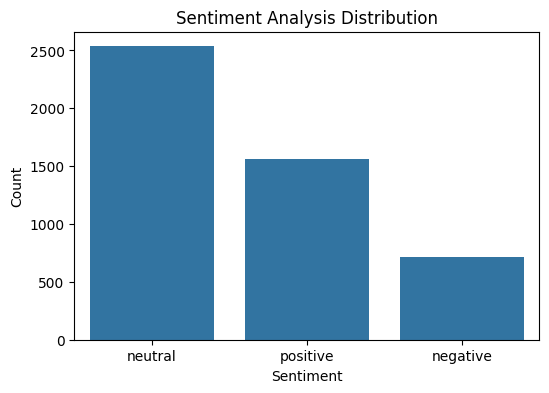

In [19]:
#visulaization
plt.figure(figsize=(6,4))
sns.countplot(x='Predicted_Sentiment', data=df)
plt.title("Sentiment Analysis Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [20]:
comparison = pd.crosstab(df['sentiment'], df['Predicted_Sentiment'])
print(comparison)

Predicted_Sentiment  negative  neutral  positive
sentiment                                       
negative                  491      318       192
neutral                   185      736       509
positive                   38      200       865
